In [37]:
import torch
from colorization_unet import ColorizationUNet
import matplotlib.pyplot as plt

model = ColorizationUNet()
# 创建一个示例灰度图像，尺寸为(1, 1, 160, 160)
input_image = torch.randn(1, 1, 160, 160)
# 前向传播
output_image = model(input_image)
print(output_image.shape)  # 输出尺寸应为(1, 3, 160, 160)


torch.Size([1, 3, 160, 160])


In [38]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [39]:

# 将模型移动到GPU（如果可用）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [40]:
model.load_state_dict(torch.load('./checkpoints/colorization_epoch_50.pth', map_location=device, weights_only=True))

<All keys matched successfully>

In [41]:
model.eval()

ColorizationUNet(
  (enc1): ConvBlock(
    (conv): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc2): ConvBlock(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc3): ConvBlock(
    (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc4): ConvBlock(
    (conv): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (enc5): ConvBlock(
    (conv): Conv2d(512, 512, kernel_size=(3, 3), stride

In [42]:
import torchvision.transforms as transforms

In [43]:
# 定义与训练时相同的变换
transform = transforms.Compose([
    transforms.Resize((160, 160)),
    transforms.ToTensor(),
])

In [44]:
import numpy as np
from PIL import Image

In [45]:
# 加载灰度图像并预处理
gray_image = Image.open('landscape/color/0.jpg').convert('L')
gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备

np.array(gray_image).shape

(150, 150)

In [46]:
# 使用模型进行预测
with torch.no_grad():
    output_color = model(gray_tensor)

# 将输出转换为图像并保存
output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]


In [55]:
def colorized(model, img_path):
    # 加载灰度图像并预处理
    gray_image = Image.open(img_path).convert('L')

    gray_tensor = transform(gray_image).unsqueeze(0).to(device)  # 添加批次维度并移动到设备
    # 使用模型进行预测
    with torch.no_grad():
        output_color = model(gray_tensor)

    # 将输出转换为图像并保存
    output_color = output_color.squeeze(0).cpu().numpy()  # 移除批次维度并移动到 CPU
    output_img = np.transpose(output_color, (1, 2, 0))  # 调整维度顺序为 [H, W, C]
    return gray_image, output_img

# gray_image, output_img = colorized(model, 'landscape/gray/1.jpg')
# plt.imshow(gray_image, 'grey')


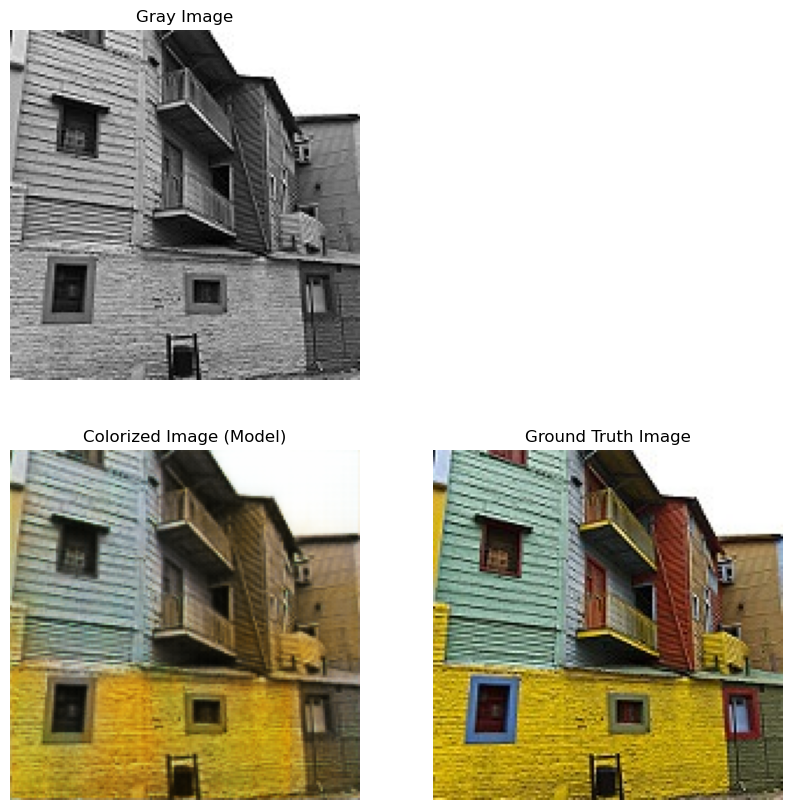

In [62]:
# 调用colorized函数，获取灰度图像和生成的彩色图像
gray_image, output_img = colorized(model, 'landscape/gray/1.jpg')

# 加载 Ground Truth 彩色图像
ground_truth = Image.open('landscape/color/1.jpg')

# 创建一个图像窗口，并设置显示多个图像的布局
plt.figure(figsize=(10, 10))

# 第一个子图：灰度图像
plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')  # 显示灰度图像，使用灰度颜色映射
plt.title('Gray Image')
plt.axis('off')  # 隐藏坐标轴

# 第二个子图：模型生成的彩色图像
plt.subplot(2, 2, 3)
plt.imshow(output_img)  # 显示模型生成的彩色图像
plt.title('Colorized Image (Model)')
plt.axis('off')  # 隐藏坐标轴

# 第三个子图：Ground Truth 彩色图像
plt.subplot(2, 2, 4)
plt.imshow(ground_truth)  # 显示真实的彩色图像 (Ground Truth)
plt.title('Ground Truth Image')
plt.axis('off')  # 隐藏坐标轴

# 显示所有图像
plt.show()